In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [21]:
df = yf.download('2330.TW', period='10y')
df = df.reset_index()
df = df.drop(['Date', 'Adj Close'], axis = 1)

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

[*********************100%***********************]  1 of 1 completed


In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
51/51 [==============================] - 19s 267ms/step - loss: 0.0411
Epoch 2/50
51/51 [==============================] - 14s 282ms/step - loss: 0.0080
Epoch 3/50
51/51 [==============================] - 15s 283ms/step - loss: 0.0073
Epoch 4/50
51/51 [==============================] - 14s 270ms/step - loss: 0.0067
Epoch 5/50
51/51 [==============================] - 14s 268ms/step - loss: 0.0061
Epoch 6/50
51/51 [==============================] - 14s 272ms/step - loss: 0.0064
Epoch 7/50
51/51 [==============================] - 14s 268ms/step - loss: 0.0062
Epoch 8/50
51/51 [==============================] - 14s 265ms/step - loss: 0.0054
Epoch 9/50
51/51 [==============================] - 14s 270ms/step - loss: 0.0051
Epoch 10/50
51/51 [==============================] - 15s 296ms/step - loss: 0.0050
Epoch 11/50
51/51 [==============================] - 14s 277ms/step - loss: 0.0049
Epoch 12/50
51/51 [==============================] - 14s 268ms/step - loss: 0.0049
Epoch 13/50
5

In [23]:
model.save('lstm_model.h5')

In [27]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index=True)
input_data = scaler.fit_transform(final_df)

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)


y_predicted = model.predict(x_test)

scaler.scale_

 2/23 [=>............................] - ETA: 1s

<ipython-input-27-aa7ab8be4ce2>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


23/23 [==============================] - 2s 74ms/step


array([0.00229885])

In [28]:
scale_factor = 1/0.00229885
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

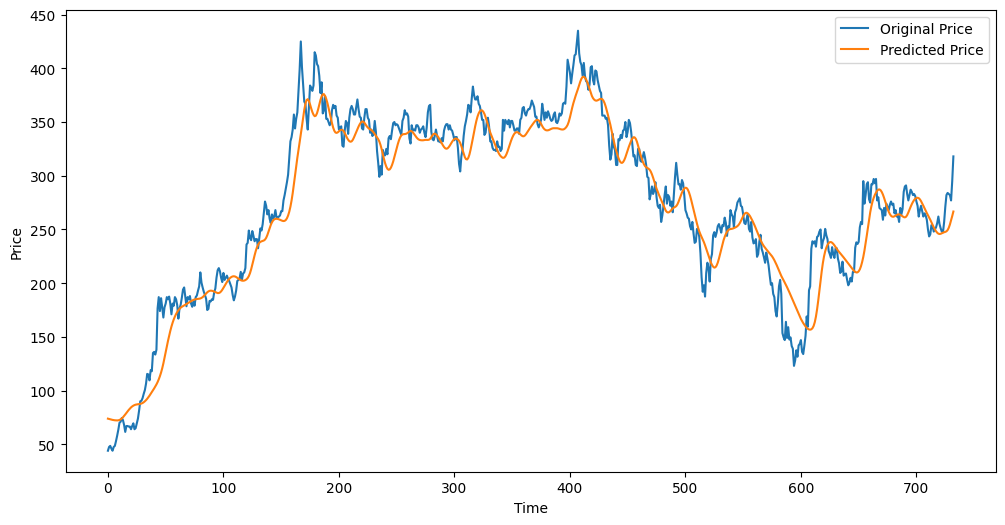

In [29]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label = 'Original Price')
plt.plot(y_predicted, label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()